In [169]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [170]:
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/refs/heads/master/titanic.csv'
df = pd.read_csv('Housing.csv')

In [171]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


get numerical and categorical columns

In [173]:
# find numerical features
num_features = df.select_dtypes(include=['number']).columns
print(num_features)

# find categorical features
cat_features = df.select_dtypes(include=['object']).columns
print(cat_features)

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking'], dtype='object')
Index(['mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'prefarea', 'furnishingstatus'],
      dtype='object')


find missing values

In [174]:
#missing values
missing_val = df.isnull().sum()
missing_val.sort_values(ascending=False)

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

no missing values

In [175]:
cat_features

Index(['mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [176]:
print("mainroad: ", df['mainroad'].unique())
print("guestroom: ", df['guestroom'].unique())
print("basement: ", df['basement'].unique())
print("hotwaterheating: ", df['hotwaterheating'].unique())
print("airconditioning: ", df['airconditioning'].unique())
print("prefarea: ", df['prefarea'].unique())
print("furnishingstatus: ", df['furnishingstatus'].unique())

mainroad:  ['yes' 'no']
guestroom:  ['no' 'yes']
basement:  ['no' 'yes']
hotwaterheating:  ['no' 'yes']
airconditioning:  ['yes' 'no']
prefarea:  ['yes' 'no']
furnishingstatus:  ['furnished' 'semi-furnished' 'unfurnished']


convert categorical to numerical

In [177]:
df['mainroad']=df['mainroad'].map({'no':0, 'yes':1})
df['guestroom']=df['guestroom'].map({'no':0, 'yes':1})
df['basement']=df['basement'].map({'no':0, 'yes':1})
df['hotwaterheating']=df['hotwaterheating'].map({'no':0, 'yes':1})
df['airconditioning']=df['airconditioning'].map({'no':0, 'yes':1})
df['prefarea']=df['prefarea'].map({'no':0, 'yes':1})

using pd.get_dummies for one hot encoding. drop_first=True means drop first encoded column to reduce complexity

In [178]:
df = pd.get_dummies(df, columns=['furnishingstatus'], drop_first=True).astype(int)

In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   price                            545 non-null    int64
 1   area                             545 non-null    int64
 2   bedrooms                         545 non-null    int64
 3   bathrooms                        545 non-null    int64
 4   stories                          545 non-null    int64
 5   mainroad                         545 non-null    int64
 6   guestroom                        545 non-null    int64
 7   basement                         545 non-null    int64
 8   hotwaterheating                  545 non-null    int64
 9   airconditioning                  545 non-null    int64
 10  parking                          545 non-null    int64
 11  prefarea                         545 non-null    int64
 12  furnishingstatus_semi-furnished  545 non-null    i

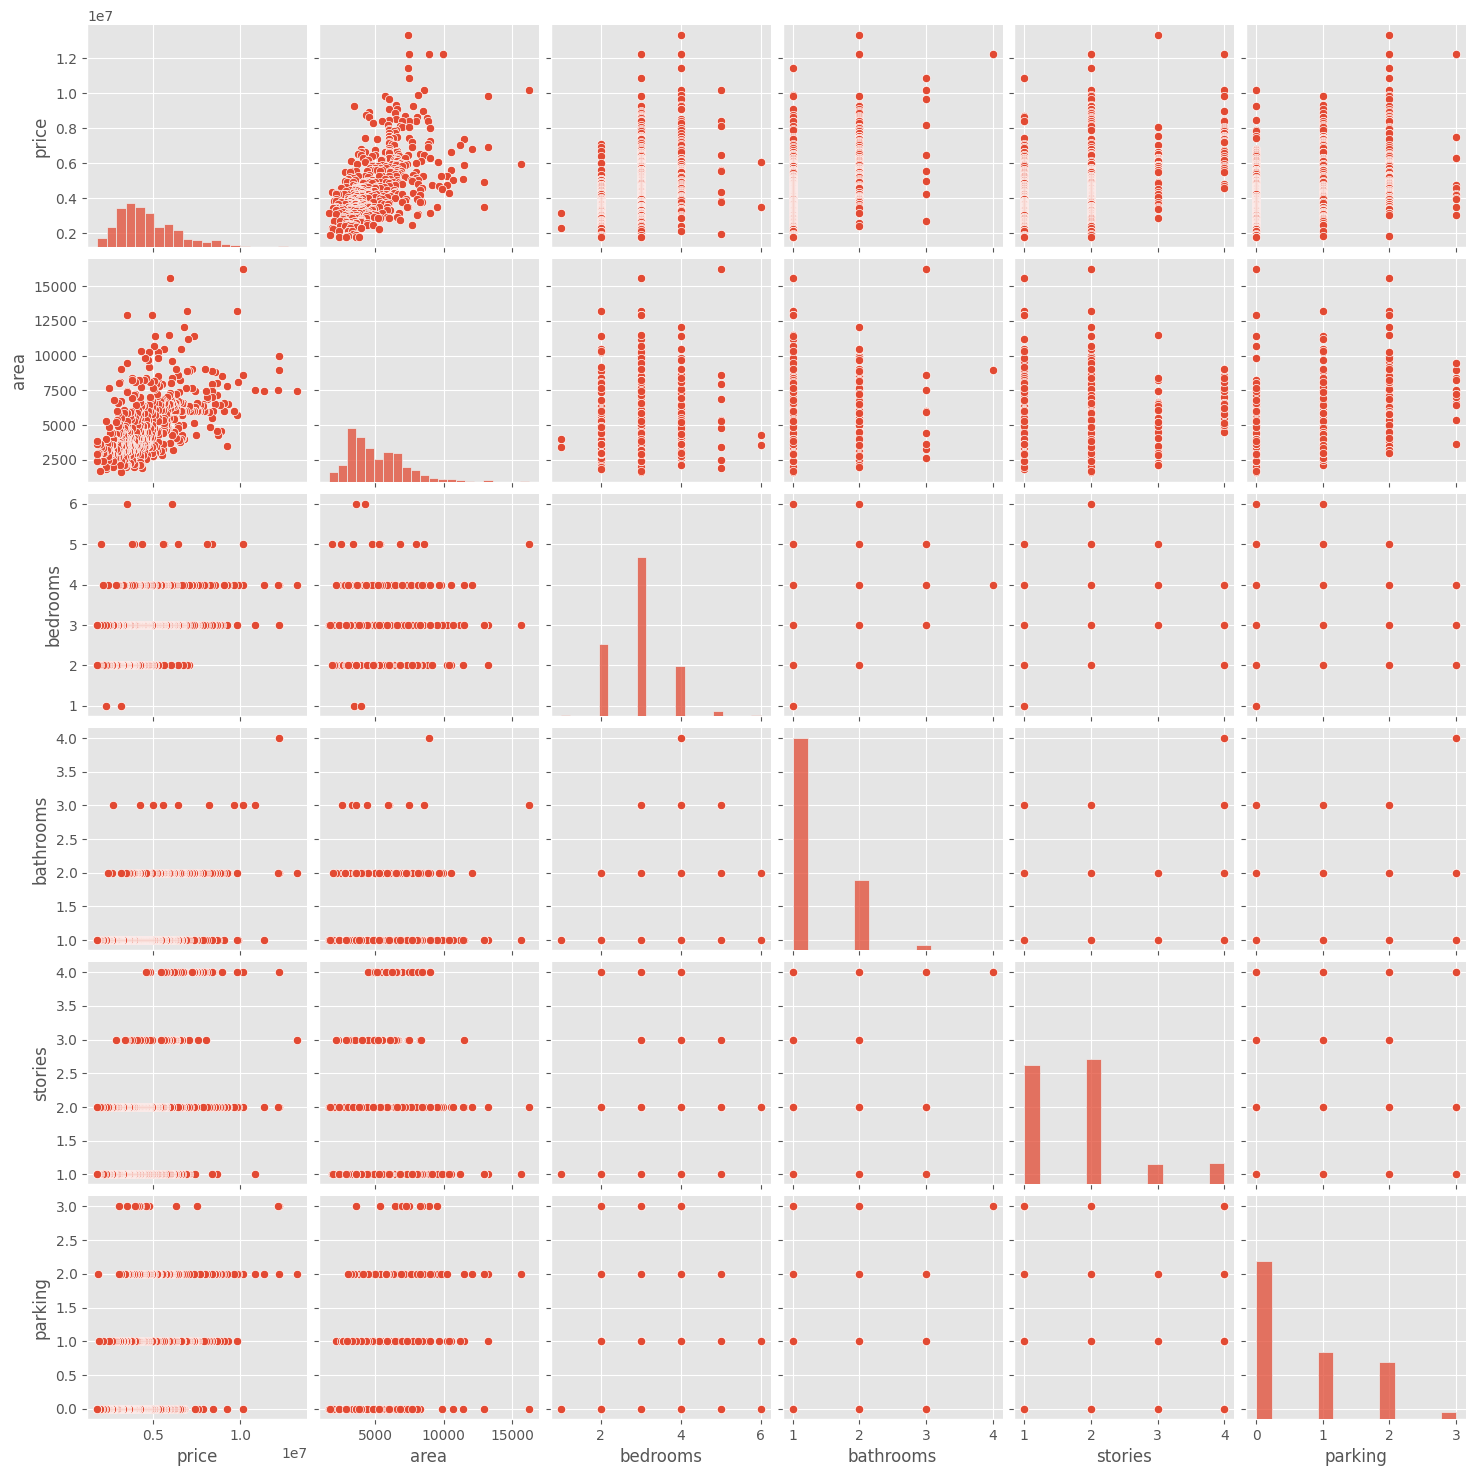

In [180]:
sns.pairplot(data=df[num_features])
plt.show()

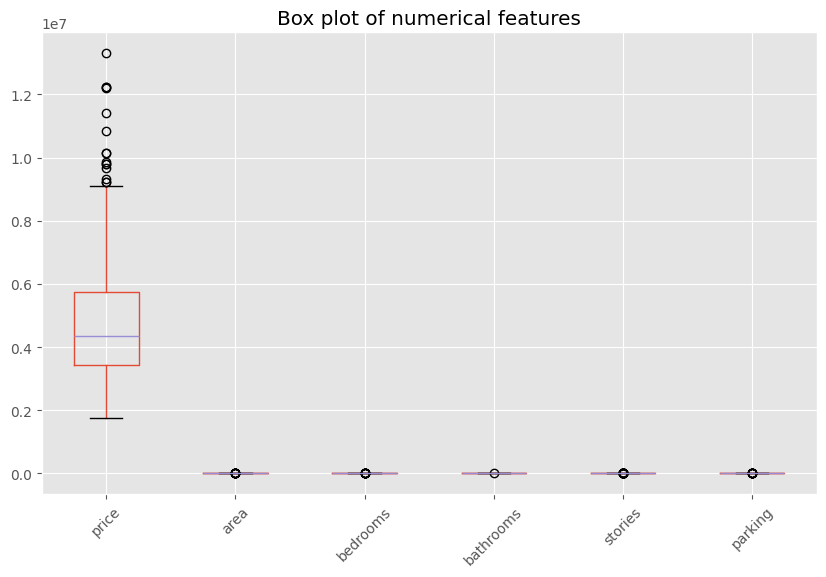

In [181]:
df[num_features].boxplot(figsize=(10, 6))
plt.xticks(rotation=45)
plt.title('Box plot of numerical features')
plt.show()

In [182]:
df_outlier = df[['price']]

In [183]:
# Function to remove outliers using IQR
def remove_outliers(df, num_features):
    Q1 = df[num_features].quantile(0.25)
    Q3 = df[num_features].quantile(0.75)
    IQR = Q3 - Q1
    df_out = df[~((df[num_features] < (Q1 - 1.5 * IQR)) | (df[num_features] > (Q3 + 1.5 * IQR))).any(axis=1)]
    return df_out

# Remove outliers from the dataframe
df_cleaned = remove_outliers(df, df_outlier.columns)
df_cleaned.shape

(530, 14)

In [184]:
df_cleaned.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
count,5.300000e+02,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.00000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000
mean,4.600663e+06,5061.518868,2.943396,1.260377,1.788679,0.854717,0.175472,0.34717,0.043396,0.305660,0.664151,0.222642,0.416981,0.332075
std,1.596119e+06,2075.449479,0.730515,0.464359,0.861190,0.352719,0.380729,0.47652,0.203940,0.461122,0.843320,0.416413,0.493526,0.471403
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.430000e+06,3547.500000,2.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.270000e+06,4500.000000,3.000000,1.000000,2.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.600000e+06,6315.750000,3.000000,1.000000,2.000000,1.000000,0.000000,1.00000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,9.100000e+06,15600.000000,6.000000,3.000000,4.000000,1.000000,1.000000,1.00000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000


In [185]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [186]:
cols = ['price', 'area']

df[cols] = scaler.fit_transform(df[cols])

In [187]:
from sklearn.model_selection import train_test_split
X = df.drop('price', axis=1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=73)

In [188]:
#regression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error,root_mean_squared_error
from sklearn.tree import DecisionTreeRegressor

In [189]:
lr = LinearRegression()
dt = DecisionTreeRegressor()
svm = SVR()
rf = RandomForestRegressor()
gbr = GradientBoostingRegressor()

In [190]:
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
print("lr r2_score: ", r2_score(y_test, y_pred))
print("lr mean_squared_error: ", mean_squared_error(y_test, y_pred))
print("lr mean_absolute_error: ", mean_absolute_error(y_test, y_pred))
print("lr root_mean_squared_error: ", root_mean_squared_error(y_test, y_pred))

lr r2_score:  0.7678975877549465
lr mean_squared_error:  0.006856244855797346
lr mean_absolute_error:  0.06112079989545137
lr root_mean_squared_error:  0.08280244474529327


In [191]:
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)
print("dt r2_score: ", r2_score(y_test, y_pred))
print("dt mean_squared_error: ", mean_squared_error(y_test, y_pred))
print("dt mean_absolute_error: ", mean_absolute_error(y_test, y_pred))
print("dt root_mean_squared_error: ", root_mean_squared_error(y_test, y_pred))

dt r2_score:  0.4427765975483725
dt mean_squared_error:  0.01646023429758769
dt mean_absolute_error:  0.09257699623976998
dt root_mean_squared_error:  0.12829744462610193


In [192]:
svm.fit(X_train,y_train)
y_pred = svm.predict(X_test)
print("svm r2_score: ", r2_score(y_test, y_pred))
print("svm mean_squared_error: ", mean_squared_error(y_test, y_pred))
print("svm mean_absolute_error: ", mean_absolute_error(y_test, y_pred))
print("svm root_mean_squared_error: ", root_mean_squared_error(y_test, y_pred))

svm r2_score:  0.6851244560824907
svm mean_squared_error:  0.009301341624668204
svm mean_absolute_error:  0.06867483389296945
svm root_mean_squared_error:  0.09644346335894519


In [193]:
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
print("rf r2_score: ", r2_score(y_test, y_pred))
print("rf mean_squared_error: ", mean_squared_error(y_test, y_pred))
print("rf mean_absolute_error: ", mean_absolute_error(y_test, y_pred))
print("rf root_mean_squared_error: ", root_mean_squared_error(y_test, y_pred))

rf r2_score:  0.7391362732685995
rf mean_squared_error:  0.007705846600930389
rf mean_absolute_error:  0.06292291595833203
rf root_mean_squared_error:  0.08778295165309942


In [194]:
gbr.fit(X_train,y_train)
y_pred = gbr.predict(X_test)
print("gbr r2_score: ", r2_score(y_test, y_pred))
print("gbr mean_squared_error: ", mean_squared_error(y_test, y_pred))
print("gbr mean_absolute_error: ", mean_absolute_error(y_test, y_pred))
print("gbr root_mean_squared_error: ", root_mean_squared_error(y_test, y_pred))

gbr r2_score:  0.6549367843435034
gbr mean_squared_error:  0.010193077591851549
gbr mean_absolute_error:  0.06779721234504288
gbr root_mean_squared_error:  0.1009607725398907
